## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [104]:
df = pd.read_csv("Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,218945.0,...,1147187.0,1146710.0,1147090.0,1147833.0,1148717.0,1148276.0,1152108.0,1160117.0,1164604.0,1164231.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,195076.0,...,405010.0,405461.0,406698.0,408293.0,410351.0,412261.0,414306.0,416267.0,417997.0,419795.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1721974.0,1720842.0,1717028.0,1714060.0,1714273.0,1719429.0,1721641.0,1722443.0,1719270.0,1718401.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,263993.0,264834.0,265177.0,266047.0,267064.0,268704.0,270651.0,273364.0,275817.0,278966.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,210976.0,...,455800.0,455937.0,457165.0,458964.0,461415.0,463713.0,466099.0,468604.0,470797.0,473676.0


In [48]:
df = pd.read_csv("zillow_data.csv")
df = df[df.CountyName == 'San Francisco']
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
76,97565,94110,San Francisco,CA,San Francisco,San Francisco,77,213900.0,214800.0,216000.0,...,1503000,1506400,1513500,1525200,1533600,1536500,1536200,1544400,1570000,1594000
333,97576,94122,San Francisco,CA,San Francisco,San Francisco,334,278400.0,278300.0,278400.0,...,1321100,1330500,1344600,1361500,1372100,1378900,1386500,1394100,1405000,1414800
504,97567,94112,San Francisco,CA,San Francisco,San Francisco,505,210100.0,210200.0,210300.0,...,965200,979000,992700,1005200,1012100,1014900,1016300,1019600,1027100,1033800
742,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,794000.0,796500.0,799000.0,...,4157100,4140900,4145400,4172600,4171100,4147900,4136800,4137200,4148900,4160500
896,97571,94117,San Francisco,CA,San Francisco,San Francisco,897,481000.0,482300.0,483600.0,...,2675500,2687500,2696600,2709900,2723600,2759000,2818800,2856800,2871000,2882100
951,97575,94121,San Francisco,CA,San Francisco,San Francisco,952,306900.0,307600.0,308400.0,...,1508700,1522000,1537700,1553300,1566000,1577300,1581100,1584200,1601800,1622900
1107,97572,94118,San Francisco,CA,San Francisco,San Francisco,1108,427200.0,429200.0,431400.0,...,2460600,2440700,2447300,2474100,2465700,2453600,2470600,2487800,2471500,2444200
1256,97568,94114,San Francisco,CA,San Francisco,San Francisco,1257,394700.0,396000.0,397700.0,...,2323600,2312900,2297500,2301000,2319900,2345000,2363800,2390600,2419700,2423800
1395,97558,94103,San Francisco,CA,San Francisco,San Francisco,1396,281000.0,280900.0,280800.0,...,1702800,1711200,1724400,1748500,1770700,1792100,1812100,1821100,1829300,1837700


----------------------------------------------------------------------

How to melt a dataframe

cheese_list = []

for i in list(df.RegionID):

    one_obsv_df = df.loc[df['RegionID']== i]
    
    cheese = pd.concat([one_obsv_df.RegionID,one_obsv_df.iloc[:,8:]],axis = 1)
    
    cheese = pd.melt(cheese, id_vars =['RegionID'])
    
    cheese_list.append(cheese)
    
cheese_df = pd.concat(cheese_list, axis = 0)

cheese_df.variable = pd.to_datetime(cheese_df.variable)

#cheese_df.to_csv('cheese_df.csv',index=False)



--------------------------------------------------------

In [51]:
list(df.RegionID)

[97564,
 97565,
 97576,
 97567,
 97569,
 97571,
 97575,
 97572,
 97568,
 97558,
 97562,
 97570,
 97577,
 97585,
 97587,
 97588,
 97586,
 97578,
 97581]

In [52]:
cheese_list = []

for i in list(df.RegionID):

    one_obsv_df = df.loc[df['RegionID']== i]

    cheese = pd.concat([one_obsv_df.RegionID,one_obsv_df.iloc[:,8:]],axis = 1)

    cheese = pd.melt(cheese, id_vars =['RegionID'])

    cheese_list.append(cheese)
    cheese_df = pd.concat(cheese_list, axis = 0)

cheese_df.variable = pd.to_datetime(cheese_df.variable)

#cheese_df.to_csv('cheese_df.csv',index=False)

In [53]:
cheese_df

,RegionID,variable,value
0,97564,1996-05-01,771100.0
1,97564,1996-06-01,776500.0
2,97564,1996-07-01,781900.0
3,97564,1996-08-01,787300.0
4,97564,1996-09-01,793000.0
...,...,...,...
259,97581,2017-12-01,1704500.0
260,97581,2018-01-01,1719100.0
261,97581,2018-02-01,1730800.0
262,97581,2018-03-01,1745700.0


In [43]:
cheese_df = pd.read_csv('cheese_df.csv')
cheese_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cheese_df.csv'

In [96]:
cheese_df.value.max()

19314900.0

# EDA 

## Process melted to separate cities

In [54]:
sf_id = list(df[df.CountyName == 'San Francisco'].RegionID)

sf_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  sf_id], axis = 0)


# la_id = list(df[df.CountyName == 'Los Angeles'].RegionID)

# la_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  la_id], axis = 0)

In [56]:
sf_cheese_df_97564 = sf_cheese_df[sf_cheese_df.RegionID == sf_id[0]]

In [57]:
sf_cheese_df_97564

,RegionID,variable,value
0,97564,1996-05-01,771100.0
1,97564,1996-06-01,776500.0
2,97564,1996-07-01,781900.0
3,97564,1996-08-01,787300.0
4,97564,1996-09-01,793000.0
...,...,...,...
259,97564,2017-12-01,3778700.0
260,97564,2018-01-01,3770800.0
261,97564,2018-02-01,3763100.0
262,97564,2018-03-01,3779800.0


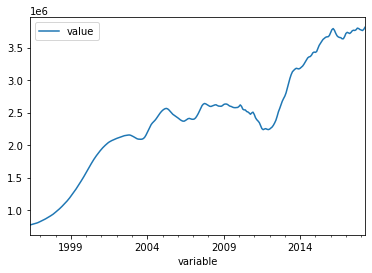

In [58]:
sf_cheese_df_97564.plot(x='variable', y = 'value') 

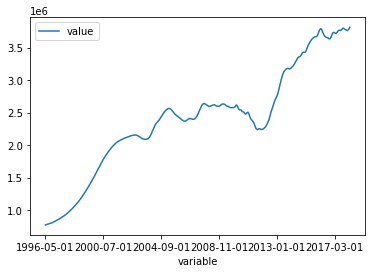

In [74]:
sf_cheese_df_97564.plot(x='variable', y = 'value') 

In [59]:
pd.to_datetime(sf_cheese_df_97564.variable)

0     1996-05-01
1     1996-06-01
2     1996-07-01
3     1996-08-01
4     1996-09-01
         ...    
259   2017-12-01
260   2018-01-01
261   2018-02-01
262   2018-03-01
263   2018-04-01
Name: variable, Length: 264, dtype: datetime64[ns]

In [60]:
sf_cheese_df_97564.variable = pd.to_datetime(sf_cheese_df_97564.variable)

In [61]:
sf_cheese_df_97564.variable.describe()

count                     264
unique                    264
top       2009-08-01 00:00:00
freq                        1
first     1996-05-01 00:00:00
last      2018-04-01 00:00:00
Name: variable, dtype: object

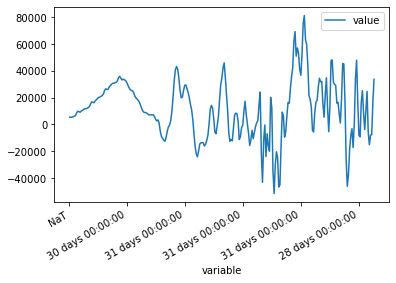

In [62]:
sf_cheese_df_97564.diff().plot(x='variable', y = 'value')

In [63]:
sf_cheese_df_97564.value

0       771100.0
1       776500.0
2       781900.0
3       787300.0
4       793000.0
         ...    
259    3778700.0
260    3770800.0
261    3763100.0
262    3779800.0
263    3813500.0
Name: value, Length: 264, dtype: float64

In [64]:
dftest = adfuller(sf_cheese_df_97564.value)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print (dfoutput)

Test Statistic                  -1.132780
p-value                          0.701824
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [65]:
dftest = adfuller(sf_cheese_df_97564.value.diff().dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print (dfoutput)

Test Statistic                  -3.534352
p-value                          0.007147
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [81]:
sf_cheese_df_97564

,RegionID,variable,value
2376,97564,1996-05-01,771100.0
2377,97564,1996-06-01,776500.0
2378,97564,1996-07-01,781900.0
2379,97564,1996-08-01,787300.0
2380,97564,1996-09-01,793000.0
...,...,...,...
2635,97564,2017-12-01,3778700.0
2636,97564,2018-01-01,3770800.0
2637,97564,2018-02-01,3763100.0
2638,97564,2018-03-01,3779800.0


## Plot ACF and PACF

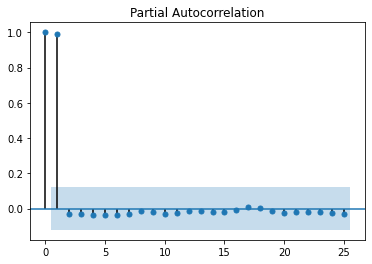

In [82]:
plot_pacf(sf_cheese_df_97564.value);

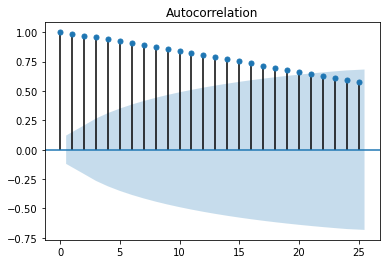

In [83]:
plot_acf(sf_cheese_df_97564.value);

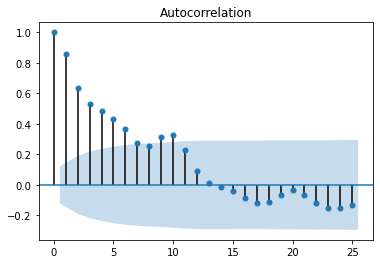

In [84]:
plot_acf(sf_cheese_df_97564.value.diff().dropna());

In [ ]:
acf_1_diff_fig, ax = plt.subplots(5, 5, figsize=(20, 20))
acf_1_diff_fig.suptitle('Autocorrelations of 1-Bedroom Time Series of San Francisco Zip Codes, Differenced Once', fontsize=24)
count = 0
for i in range(5):
    for j in range(5):
        plot_acf(sf_1_dict[keys_1[count]].diff().dropna(), ax=ax[i][j])
        ax[i][j].set_title(keys_1[count][-5:])
        count+=1
acf_1_diff_fig.tight_layout()
acf_1_diff_fig.subplots_adjust(top=0.94)
plt.savefig('images/1_bdrm_ACF_diff.png')

## Plot seasonal decomposition

<Figure size 432x288 with 0 Axes>

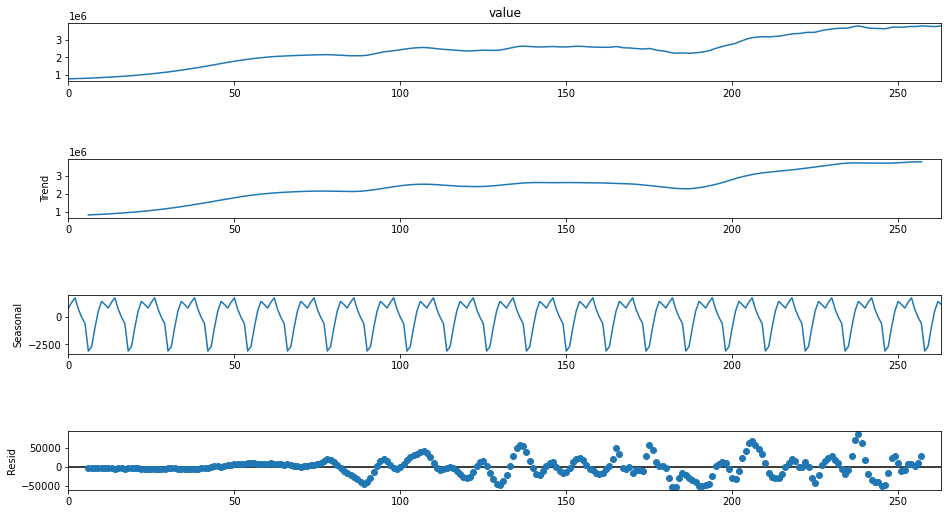

In [66]:
decomposition = seasonal_decompose(sf_cheese_df_97564.value, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [ ]:
decomp = seasonal_decompose(sf_all, freq=12)
dc_obs = decomp.observed
dc_trend = decomp.trend
dc_seas = decomp.seasonal
dc_resid = decomp.resid
dc_df = pd.DataFrame({"observed": dc_obs, "trend": dc_trend,
                        "seasonal": dc_seas, "residual": dc_resid})

decomp_fig, axes = plt.subplots(4, 1, figsize=(12, 12))
for i, ax in enumerate(axes):
    ax.plot(dc_df.iloc[:, i])
    start = dc_df.iloc[:, 0].year
    ax.set_xlim(pd.Timestamp('1996'), pd.Timestamp('2022-05-31'))
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.set_ylabel(dc_2_df.iloc[:, i].name)
    if i != 2:
        ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.setp(ax.xaxis.get_majorticklabels(), ha="right", rotation=45, rotation_mode="anchor")

decomp_2_fig.suptitle(
    'Seasonal Decomposition of 2-Bedroom Time Series of San Francisco Home Values (Mean)', fontsize=24)
decomp_2_fig.tight_layout()
decomp_2_fig.subplots_adjust(top=0.94)
plt.savefig('images/2_bdrm_seasonal_decomp.png')

In [86]:
sf_cheese_df_97564.variable.describe()

count                     264
unique                    264
top       2009-08-01 00:00:00
freq                        1
first     1996-05-01 00:00:00
last      2018-04-01 00:00:00
Name: variable, dtype: object

In [87]:
sf_cheese_df_97564.drop('RegionID', axis=1, inplace=True)

In [88]:
sf_cheese_df_97564.columns

Index(['variable', 'value'], dtype='object')

In [89]:
sf_cheese_df_97564.columns = ['date','value']

In [91]:
sf_cheese_df_97564

,value
date,
1996-05-01,771100.0
1996-06-01,776500.0
1996-07-01,781900.0
1996-08-01,787300.0
1996-09-01,793000.0
...,...
2017-12-01,3778700.0
2018-01-01,3770800.0
2018-02-01,3763100.0


In [92]:
sf_cheese_df_97564 = sf_cheese_df_97564.asfreq('MS')

In [93]:
sf_cheese_df_97564

,value
date,
1996-05-01,771100.0
1996-06-01,776500.0
1996-07-01,781900.0
1996-08-01,787300.0
1996-09-01,793000.0
...,...
2017-12-01,3778700.0
2018-01-01,3770800.0
2018-02-01,3763100.0


## Run SARIMAX on one zip code

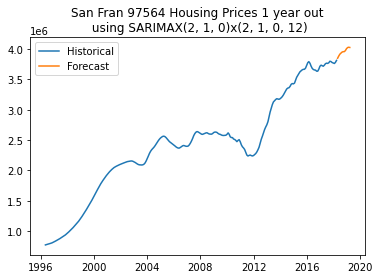

In [94]:
sari_mod =SARIMAX(sf_cheese_df_97564,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
forecast = sari_mod.forecast(steps=12)
fig, ax = plt.subplots()

ax.plot(sf_cheese_df_97564.index, sf_cheese_df_97564.value, label='Historical')
ax.plot(forecast, label='Forecast')
ax.set_title(f'San Fran 97564 Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')

plt.legend();

In [ ]:
pd

In [101]:
ids = list(set(sf_cheese_df.RegionID))
keys = ["sf_cheese_df_" + i for i in list(map(str,ids))]
sf_df_list= []
for i in ids:
    sf_df_list.append(sf_cheese_df[sf_cheese_df.RegionID == i])
    sf_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    sf_df_list[-1].columns = ['date', 'value']
    sf_df_list[-1].date = pd.to_datetime(sf_df_list[-1].date)
    sf_df_list[-1].set_index('date', inplace = True)
    sf_df_list[-1].asfreq('MS')
sf_dict = dict(zip(keys,sf_df_list))
ids = list(set(la_cheese_df.RegionID))
keys = ["la_cheese_df_" + i for i in list(map(str,ids))]
la_df_list= []
for i in ids:
    la_df_list.append(la_cheese_df[la_cheese_df.RegionID == i])
    la_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    la_df_list[-1].columns = ['date', 'value']
    la_df_list[-1].date = pd.to_datetime(la_df_list[-1].date)
    la_df_list[-1].set_index('date', inplace = True)
    la_df_list[-1].asfreq('MS')
la_dict = dict(zip(keys,la_df_list))

In [102]:
sf_dict

{'sf_cheese_df_97558':                 value
 date                 
 1996-05-01   280900.0
 1996-06-01   280800.0
 1996-07-01   280700.0
 1996-08-01   280500.0
 1996-09-01   280400.0
 ...               ...
 2017-12-01  1792100.0
 2018-01-01  1812100.0
 2018-02-01  1821100.0
 2018-03-01  1829300.0
 2018-04-01  1837700.0
 
 [264 rows x 1 columns],
 'sf_cheese_df_97562':                 value
 date                 
 1996-05-01   273000.0
 1996-06-01   275200.0
 1996-07-01   277500.0
 1996-08-01   279800.0
 1996-09-01   282100.0
 ...               ...
 2017-12-01  1698200.0
 2018-01-01  1717400.0
 2018-02-01  1737600.0
 2018-03-01  1757900.0
 2018-04-01  1772500.0
 
 [264 rows x 1 columns],
 'sf_cheese_df_97564':                 value
 date                 
 1996-05-01   771100.0
 1996-06-01   776500.0
 1996-07-01   781900.0
 1996-08-01   787300.0
 1996-09-01   793000.0
 ...               ...
 2017-12-01  3778700.0
 2018-01-01  3770800.0
 2018-02-01  3763100.0
 2018-03-01  3779800.0
 2018-

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/ts

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


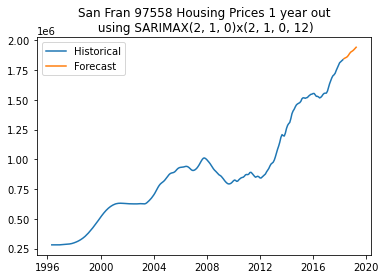

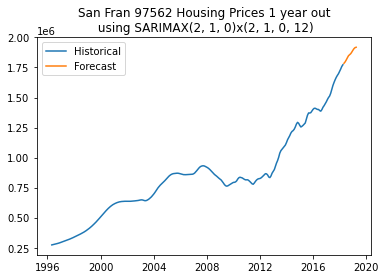

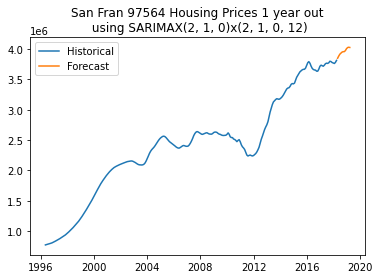

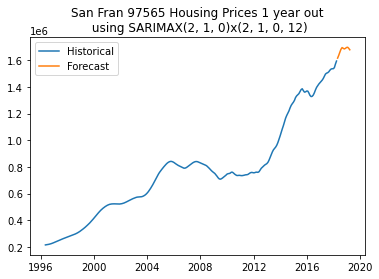

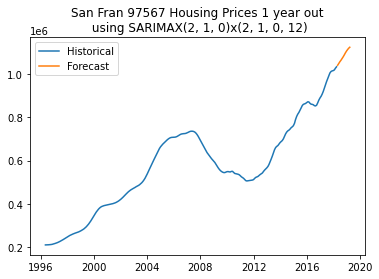

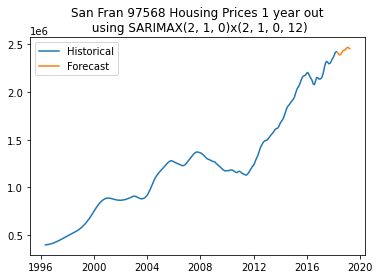

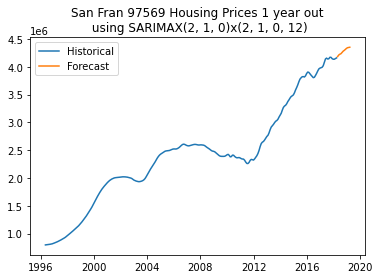

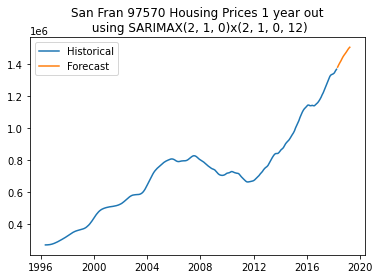

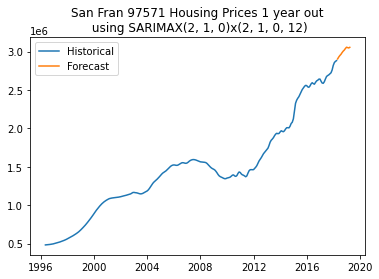

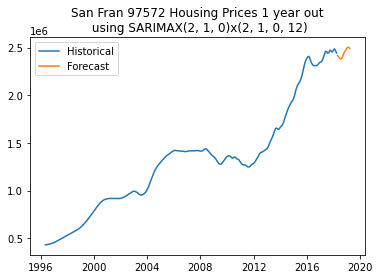

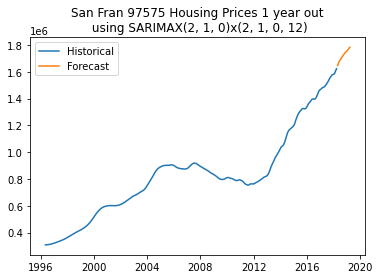

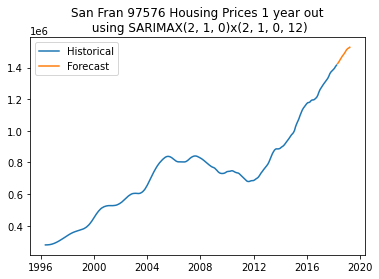

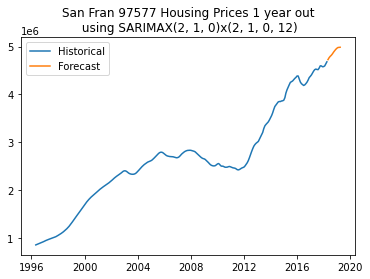

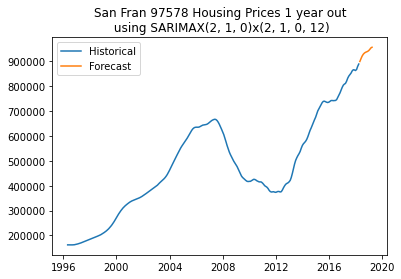

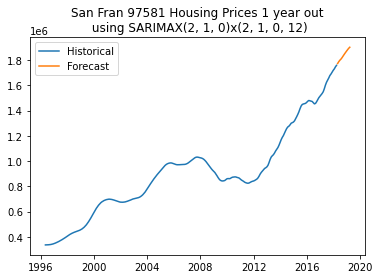

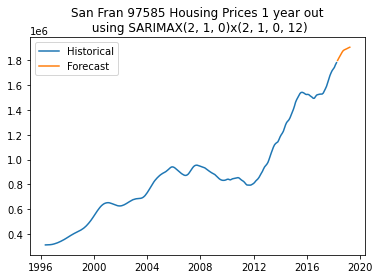

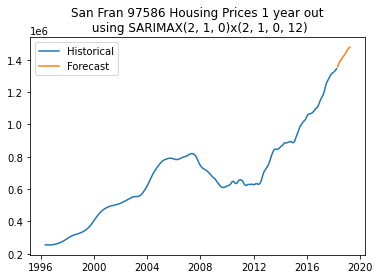

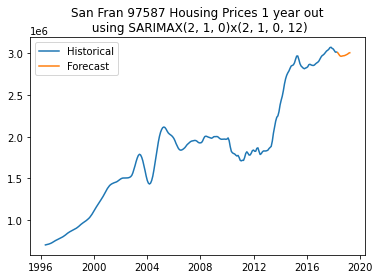

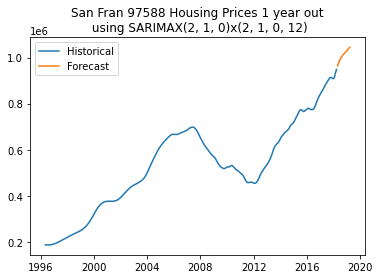

In [103]:
sf_forecast_dict = {}
for regionid, df  in sf_dict.items():
    sari_mod =SARIMAX(df,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
    forecast = sari_mod.forecast(steps=12)
    sf_forecast_dict[regionid] = forecast
    fig, ax = plt.subplots()
    ax.plot(df.index, df.value, label='Historical')
    ax.plot(forecast, label='Forecast')
    ax.set_title(f'San Fran {regionid[-5:]} Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')
    plt.legend();